In [11]:
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

In [12]:
root_path = Path("/home/liuxinhang/Projects/gaussian-splatting/debug_track_data")
total_cm = sorted(root_path.glob("*cm*"), key=lambda x: int(x.stem.split("_")[0]))
total_degree = sorted(root_path.glob("*degree*"), key=lambda x: int(x.stem.split("_")[0]))

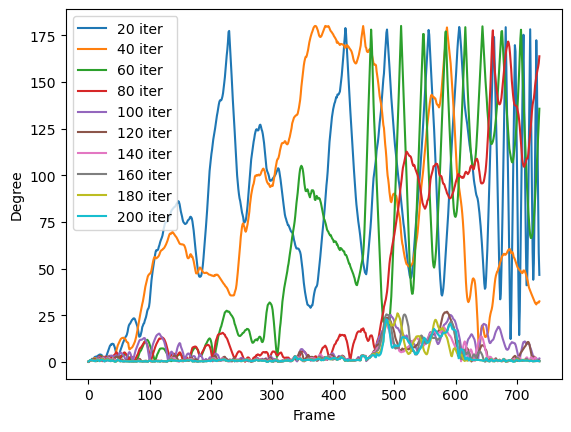

In [13]:
for degree_path in total_degree[1::2]:
	degree = np.load(degree_path)
	iteration = int(degree_path.stem.split("_")[0])
	plt.plot(degree, label=f"{iteration} iter")
plt.legend(loc='upper left')
plt.xlabel('Frame')
plt.ylabel('Degree')
plt.show()

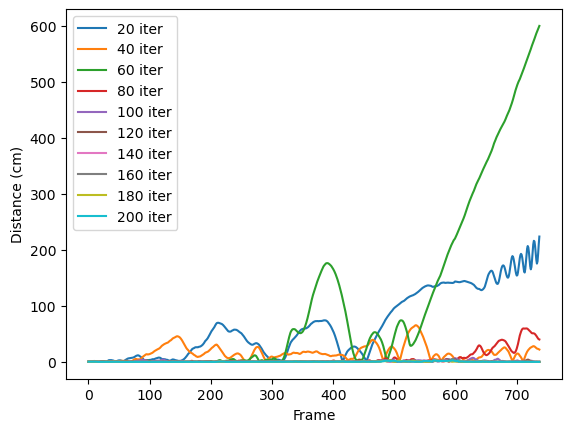

In [14]:
for cm_path in total_cm[1::2]:
	cm = np.load(cm_path)
	iteration = int(cm_path.stem.split("_")[0])
	plt.plot(cm, label=f"{iteration} iter")
plt.legend(loc='upper left')
plt.xlabel('Frame')
plt.ylabel('Distance (cm)')
plt.show()

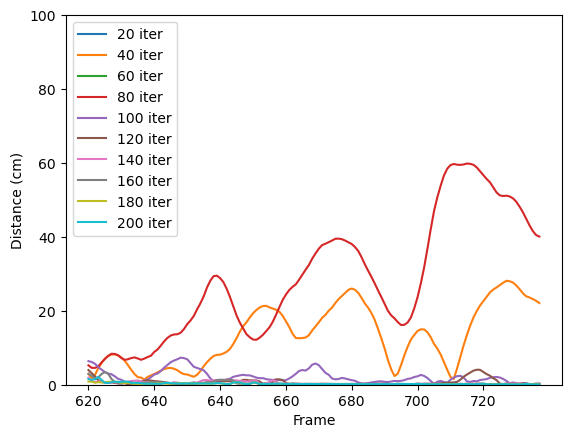

In [15]:
for cm_path in total_cm[1::2]:
	cm = np.load(cm_path)[600:]
	iteration = int(cm_path.stem.split("_")[0])
	plt.plot(cm, label=f"{iteration} iter")
plt.legend(loc='upper left')
plt.xlabel('Frame')
plt.ylabel('Distance (cm)')
plt.xticks(np.linspace(0, 120, 7, endpoint=True), ['620', '640', '640', '660', '680', '700', '720'])
plt.ylim(0, 100)
plt.show()

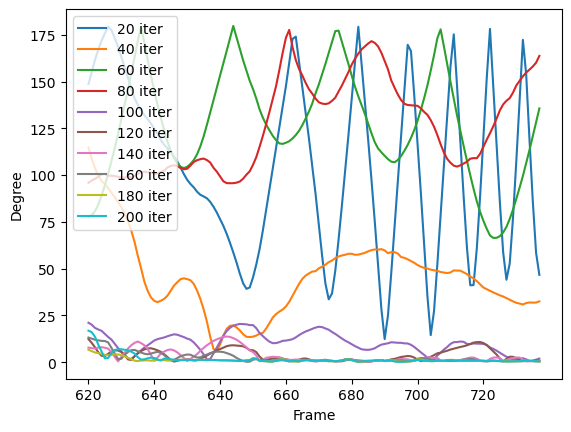

In [16]:
for degree_path in total_degree[1::2]:
	degree = np.load(degree_path)[600:]
	iteration = int(degree_path.stem.split("_")[0])
	plt.plot(degree, label=f"{iteration} iter")
plt.legend(loc='upper left')
plt.xlabel('Frame')
plt.ylabel('Degree')
plt.xticks(np.linspace(0, 120, 7, endpoint=True), ['620', '640', '640', '660', '680', '700', '720'])
plt.show()

In [22]:
degree_200 = np.load(total_degree[-7])
cm_200 = np.load(total_cm[-7])

In [23]:
def compute_degree_and_cm_ratio(degree, cm, degree_threshold = 5, cm_threshold=5):
	valid = np.logical_and(degree < degree_threshold, cm < cm_threshold)
	return np.sum(valid) / len(valid)

(0.0, 1.0)

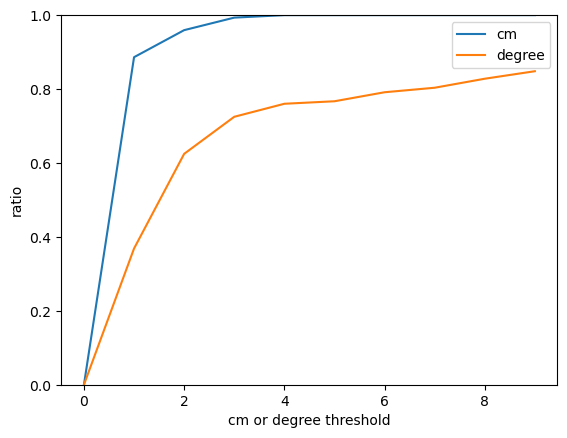

In [24]:
cm = [compute_degree_and_cm_ratio(degree_200, cm_200, degree_threshold=360, cm_threshold=i) for i in range(10)]
plt.plot(cm, label="cm")
plt.xlabel("cm or degree threshold")
plt.ylabel("ratio")

degree = [compute_degree_and_cm_ratio(degree_200, cm_200, degree_threshold=i, cm_threshold=100) for i in range(10)]
plt.plot(degree, label="degree")

plt.legend()
plt.ylim(0, 1)


(0.0, 1.0)

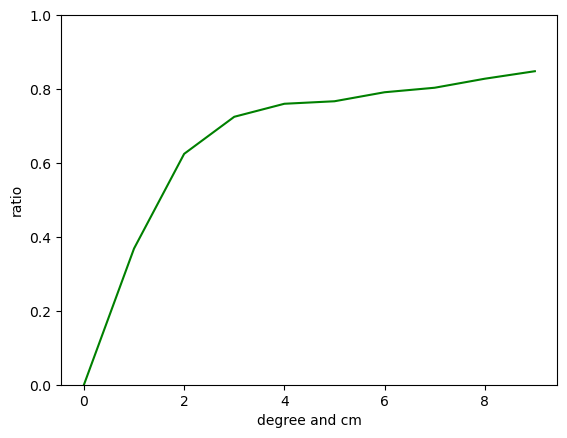

In [25]:
degree_cm = [compute_degree_and_cm_ratio(degree_200, cm_200, degree_threshold=i, cm_threshold=i) for i in range(10)]
plt.plot(degree_cm, label="degree and cm", color="g")

plt.xlabel("degree and cm")
plt.ylabel("ratio")
plt.ylim(0, 1)

In [26]:
print(degree_cm)

[0.0, 0.3685636856368564, 0.6246612466124661, 0.7249322493224932, 0.7601626016260162, 0.7669376693766937, 0.7913279132791328, 0.8035230352303523, 0.8279132791327913, 0.8482384823848238]


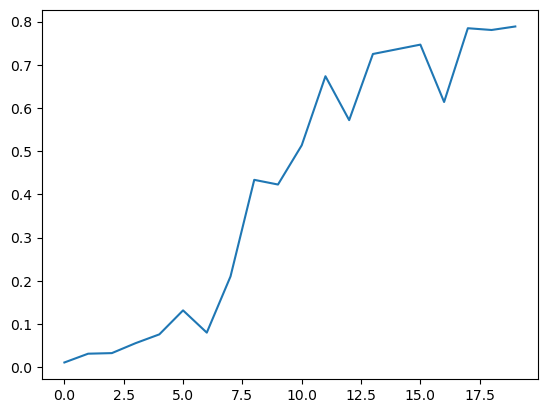

In [29]:
plt.plot([compute_degree_and_cm_ratio(np.load(degree), np.load(cm), 3, 3) for degree, cm in zip(total_degree, total_cm)])